# Importing the libraries

In [53]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [54]:
df = pd.read_csv("./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Getting to know the Dataset

In [55]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [56]:
df.drop(["Id"], axis = 1, inplace = True )

df["Species"] = df["Species"].str.replace("Iris-", "")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Performing EDA

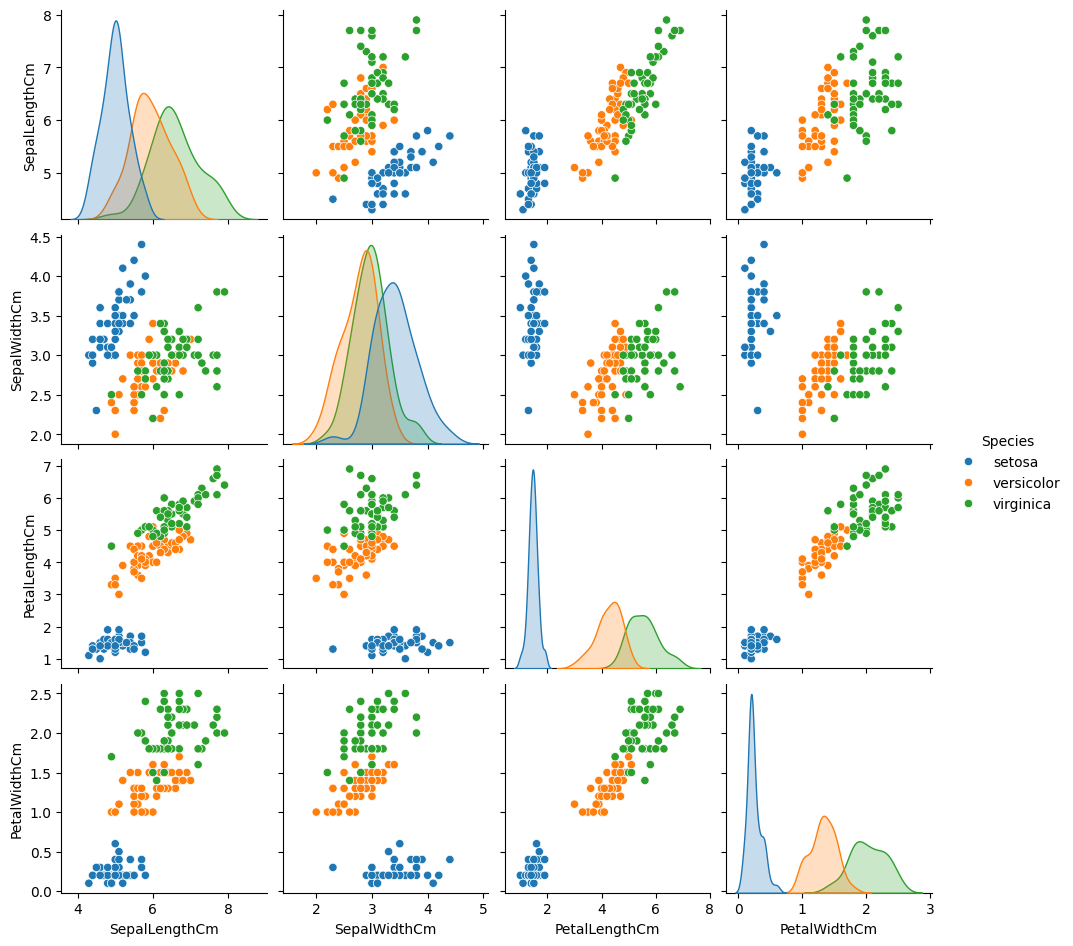

In [58]:
sns.pairplot(df, hue = "Species", height = 2.4)

In [59]:
df["Species_num"] = df["Species"]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [60]:
df["Species_num"] = df["Species_num"].str.replace("setosa", "1")
df["Species_num"] = df["Species_num"].str.replace("versicolor", "2")
df["Species_num"] = df["Species_num"].str.replace("virginica", "3")


df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [62]:
df["Species_num"] = pd.to_numeric(df["Species_num"], downcast = "integer")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


In [63]:
new_df = df.copy()

<Axes: >

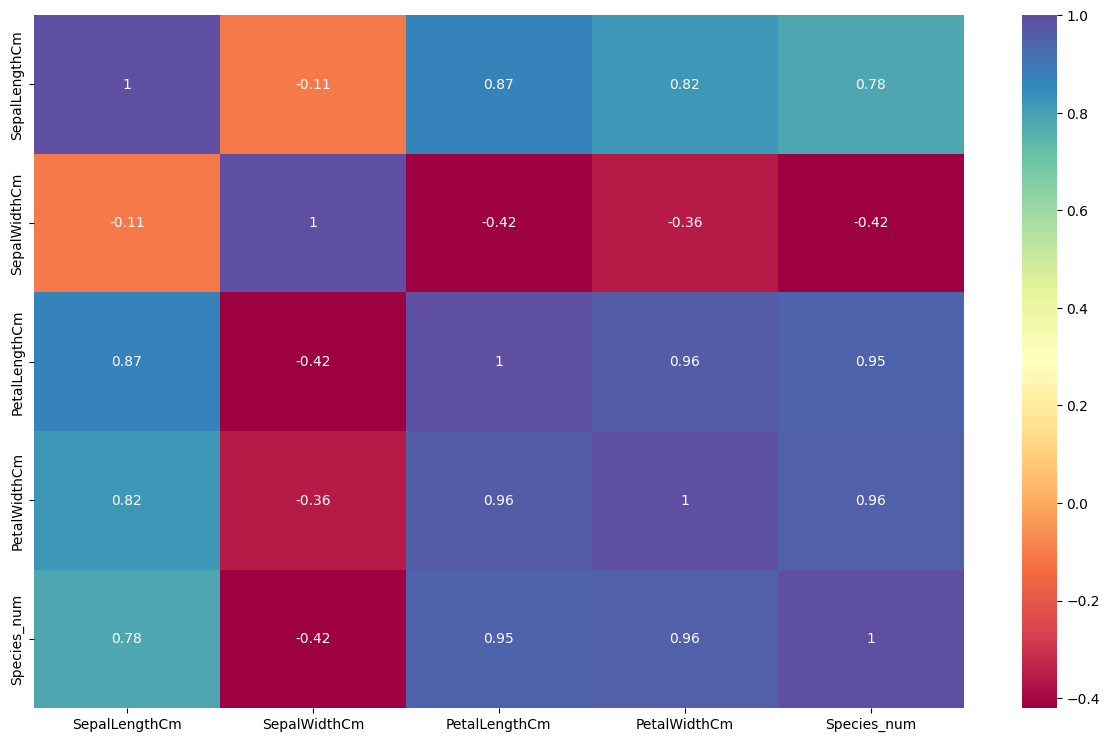

In [64]:

df.drop(["Species"], axis = 1, inplace = True)

plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap = "Spectral")

In [65]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


#### We can see in the heatmap that 'petalWithCm' and 'PetalLengthCm' both have strong correlation with the 'Species' or target column. Therefore, we have to drop the one with the least effect.

In [66]:
df = new_df.copy()

df.drop(["PetalLengthCm"], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species,Species_num
0,5.1,3.5,0.2,setosa,1
1,4.9,3.0,0.2,setosa,1
2,4.7,3.2,0.2,setosa,1
3,4.6,3.1,0.2,setosa,1
4,5.0,3.6,0.2,setosa,1


# Modeling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df.drop(["Species"], axis = 1)
y = df["Species"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

accuracy = accuracy_score(y_test, y_preds)

print(f"Accuracy is {accuracy}")

Accuracy is 1.0


In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
cross_val.mean()

1.0

In [69]:
cross_val

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
print(confusion_matrix(y_test, y_preds))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(0.5, 23.52222222222222, 'Predicted Values')

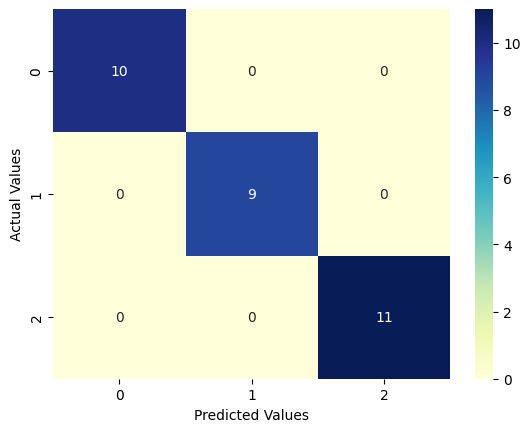

In [71]:
cnf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(data = cnf_matrix, cmap = "YlGnBu", annot = True)

plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



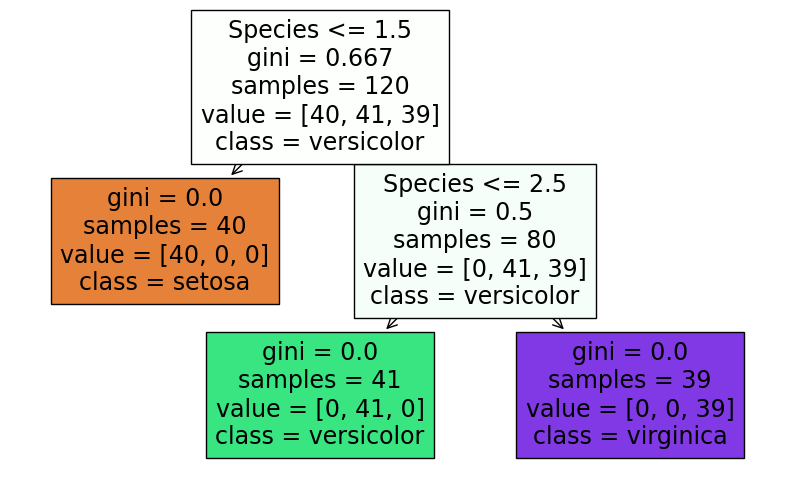

In [77]:
from sklearn import tree

features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]

plt.figure(figsize = (10, 6))
tree2 = tree.plot_tree(model, filled = True, feature_names = features, class_names = targets)


In [78]:
from sklearn.model_selection import GridSearchCV

model2 = DecisionTreeClassifier()

dt_params = {"criterion": ["gini", "entropy"],
             "max_depth": np.arange(2, 14, 2),
             "max_features": ["auto", "sqrt", "log2"]}

dt_cv_model = GridSearchCV(estimator = model2, param_grid = dt_params, cv = 10)
dt_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [79]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}

In [81]:
tuned_model = DecisionTreeClassifier(criterion = "gini", max_depth = 6, max_features = "log2")
tuned_model.fit(x_train, y_train)

y_pred = tuned_model.predict(x_test)

print("accuracy: ", accuracy_score(y_test, y_pred))


accuracy:  1.0


In [84]:
print("confusion matrix: ", confusion_matrix(y_test, y_pred ))

confusion matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [85]:
print("classificaiton report: ", classification_report(y_test, y_pred ))

classificaiton report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

